# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

Version: 0.250327.2220

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset [001333 (version 0.250327.2220)](https://dandiarchive.org/dandiset/001333/0.250327.2220), titled "Parkinson's Electrophysiological Signal Dataset (PESD)".

According to the Dandiset metadata:

*   **Description:** The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. We generated two types of samples from each group. The parkinsonian signals show a relatively high power density at the beta frequency (13 to 30 Hz). Thus, the beta oscillations (13 to 30 Hz) in the subthalamic nucleus (STN) are typically used as the pathological biomarkers for PD symptoms. Each sample includes two types of signals: Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) from the Subthalamic Nucleus (STN). The ARV signals are in the frequency domain and LFP signals are in the time domain. Beta ARV Signal: The controller beta values are determined by calculating the Average Rectified Value (ARV) of the beta band. This is achieved by fully rectifying the filtered LFP signal using a fourth-order Chebyshev band-pass filter with an 8 Hz bandwidth, centered around the peak of the LFP power spectrum. Local Field Potential (LFP) - STN: Local Field Potentials are derived from the synchronized activity of neuron populations between the cortex, STN, and thalamus. More details can be found in our article named, “Preliminary Results of Neuromorphic Controller Design and a Parkinson's Disease Dataset Building for Closed-Loop Deep Brain Stimulation”, available at https://arxiv.org/abs/2407.17756
*   **Citation:** Biswas, Ananna (2025) Parkinson's Electrophysiological Signal Dataset (PESD) (Version 0.250327.2220) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001333/0.250327.2220
*   **License:** CC-BY-4.0

## What this notebook covers

This notebook will demonstrate how to:

1.  Connect to the DANDI archive and retrieve information about the Dandiset.
2.  List assets (files) within the Dandiset.
3.  Load a specific NWB (Neurodata Without Borders) file from the Dandiset.
4.  Inspect metadata associated with the NWB file.
5.  Load and visualize a subset of electrophysiological data (Beta Band Voltage) from the NWB file.

## Required packages

To run this notebook, you will need the following Python packages installed:

*   `dandi` (for interacting with the DANDI API)
*   `pynwb` (for working with NWB files)
*   `h5py` (a dependency for pynwb, for HDF5 file access)
*   `remfile` (for streaming remote files)
*   `numpy` (for numerical operations)
*   `matplotlib` (for plotting)
*   `pandas` (for data manipulation, e.g., viewing electrode tables)
*   `seaborn` (for enhanced visualizations)

This notebook assumes these packages are already installed in your Python environment.

## 1. Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001333"
dandiset_version = "0.250327.2220"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}") # This is the API URL for the Dandiset
print(f"View on DANDI Archive: https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})") # asset.identifier is the asset_id

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220
View on DANDI Archive: https://dandiarchive.org/dandiset/001333/0.250327.2220

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb (ID: 5409700b-e080-44e6-a6db-1d3e8890cd6c)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb (ID: da77917e-655c-4eeb-a0a6-7529a8a35901)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb (ID: aa743a96-e79b-40b1-a0df-55ef3460e856)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb (ID: 068afe41-3b8e-402f-91d4-9f297df677a2)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb (ID: b344c8b7-422f-46bb-b016-b47dc1e87c65)


## 2. Loading an NWB file

We will now load one of the NWB files from the Dandiset. For this demonstration, we'll use the file:
`sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb`.

The asset ID for this file is `b344c8b7-422f-46bb-b016-b47dc1e87c65`.
We can construct the download URL for this asset.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seaborn theme for plotting (optional, but makes plots nicer)
sns.set_theme()

# Construct the URL for the asset
asset_id_to_load = "b344c8b7-422f-46bb-b016-b47dc1e87c65"
nwb_file_url = f"https://api.dandiarchive.org/api/assets/{asset_id_to_load}/download/"
print(f"Loading NWB file from: {nwb_file_url}")

# Load the NWB file using remfile for remote access
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, 'r') # Ensure read-only mode explicitly
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read-only mode for pynwb
nwb = io.read()

print("\nSuccessfully loaded NWB file.")
# Do not display the nwb object directly as it can be very large.
# print(nwb)

Loading NWB file from: https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/



Successfully loaded NWB file.


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### 2.1. Inspecting NWB File Metadata

Let's look at some of the metadata contained within the loaded NWB file.

In [3]:
print(f"NWB File Identifier: {nwb.identifier}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter(s): {nwb.experimenter}")
if nwb.related_publications:
    print(f"Related Publications: {', '.join(nwb.related_publications)}")
if nwb.keywords:
    print(f"Keywords: {', '.join(nwb.keywords[:])}") # Use [:] to get all keywords
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

NWB File Identifier: 7a68ea11-865a-481a-a5fd-d91fe6def653
Session Description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Session Start Time: 2025-03-27 16:53:27.990500-04:00
Experimenter(s): ('Ananna Biswas',)
Related Publications: https://arxiv.org/abs/2407.17756, DOI: 10.3389/fnins.2020.00166
Keywords: ecephys, LFP, Parkinson's Disease, Beta Band
Lab: BrainX Lab
Institution: Michigan Technological University


### 2.2. Exploring Electrode Information

NWB files often contain detailed information about the electrodes used for recording.

In [4]:
if nwb.electrodes is not None:
    print("Electrode Table:")
    # Displaying the electrode table as a Pandas DataFrame for better readability
    electrode_df = nwb.electrodes.to_dataframe()
    print(electrode_df)
else:
    print("No electrode table found in this NWB file.")

Electrode Table:
                                            location  \
id                                                     
0   Simulated Cortico-basal-ganglia network of brain   
1   Simulated Cortico-basal-ganglia network of brain   
2   Simulated Cortico-basal-ganglia network of brain   
3   Simulated Cortico-basal-ganglia network of brain   
4   Simulated Cortico-basal-ganglia network of brain   
5   Simulated Cortico-basal-ganglia network of brain   
6   Simulated Cortico-basal-ganglia network of brain   
7   Simulated Cortico-basal-ganglia network of brain   
8   Simulated Cortico-basal-ganglia network of brain   
9   Simulated Cortico-basal-ganglia network of brain   
10  Simulated Cortico-basal-ganglia network of brain   
11  Simulated Cortico-basal-ganglia network of brain   

                                                group group_name         label  
id                                                                              
0   shank0 pynwb.ecephys.ElectrodeGr

### 2.3. Neurosift Link for Interactive Exploration

You can explore this NWB file interactively using Neurosift.

[Explore on Neurosift](https://neurosift.app/nwb?url={nwb_file_url}&dandisetId={dandiset_id}&dandisetVersion={dandiset_version})

(Note: Replace placeholders in the URL if copying manually, but the link above should be correctly formatted if the variables `nwb_file_url`, `dandiset_id`, and `dandiset_version` are defined.)
For this specific file:
[sub-healthy-simulated-beta_ses-162_ecephys.nwb on Neurosift](https_neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/&dandisetId=001333&dandisetVersion=0.250327.2220)

## 3. Accessing and Visualizing Data

The `nwb-file-info` tool indicated that the data is located at `nwb.processing["ecephys"]["LFP"]["Beta_Band_Voltage"]`. This is an `ElectricalSeries` object.
Let's access this data.

In [5]:
# Accessing the ElectricalSeries for Beta Band Voltage
try:
    beta_band_voltage_series = nwb.processing["ecephys"]["LFP"]["Beta_Band_Voltage"]
    print(f"Successfully accessed: {beta_band_voltage_series.name}")
    print(f"Description: {beta_band_voltage_series.description}")
    print(f"Unit: {beta_band_voltage_series.unit}")
    print(f"Data shape: {beta_band_voltage_series.data.shape}")
    print(f"Timestamps shape: {beta_band_voltage_series.timestamps.shape}")
    print(f"Timestamps unit: {beta_band_voltage_series.timestamps_unit}")

    # The data is relatively small (1400 points), so we can load it all.
    # If it were larger, we would load a subset, e.g., data = beta_band_voltage_series.data[:1000]
    data = beta_band_voltage_series.data[:]
    timestamps = beta_band_voltage_series.timestamps[:]

    print(f"\nSuccessfully loaded data and timestamps into NumPy arrays.")

except KeyError as e:
    print(f"Error: Could not find the expected data path in the NWB file: {e}")
    data = None
    timestamps = None

Successfully accessed: Beta_Band_Voltage
Description: no description
Unit: volts
Data shape: (1400,)
Timestamps shape: (1400,)
Timestamps unit: seconds

Successfully loaded data and timestamps into NumPy arrays.


### 3.1. Plotting Beta Band Voltage

Now, let's plot the Beta Band Voltage data against its timestamps.

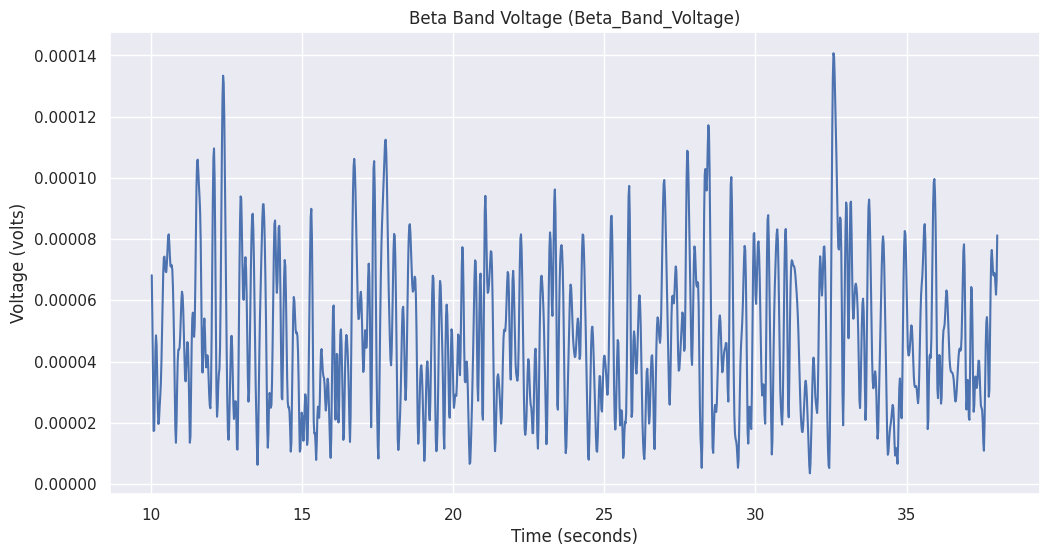

In [6]:
if data is not None and timestamps is not None:
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, data)
    plt.title(f"Beta Band Voltage ({beta_band_voltage_series.name})")
    plt.xlabel(f"Time ({beta_band_voltage_series.timestamps_unit})")
    plt.ylabel(f"Voltage ({beta_band_voltage_series.unit})")
    plt.grid(True)
    plt.show()
else:
    print("Data or timestamps could not be loaded, skipping plot.")

The plot above shows the Beta Average Rectified Voltage (ARV) signal over time. This signal is in the frequency domain representation for the beta band.

## 4. Summary of NWB File Contents (based on `nwb-file-info`)

The NWB file `sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb` contains:

*   **General Metadata:**
    *   `session_description`: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
    *   `identifier`: (unique NWB file ID, e.g., 7a68ea11-865a-481a-a5fd-d91fe6def653)
    *   `session_start_time`: (e.g., 2025-03-27T16:53:27.990500-04:00)
    *   `experimenter`: ['Ananna Biswas']
    *   `related_publications`: ['https://arxiv.org/abs/2407.17756', 'DOI: 10.3389/fnins.2020.00166']
    *   `keywords`: ['ecephys', 'LFP', "Parkinson's Disease", 'Beta Band']
*   **Subject Information:**
    *   `subject_id`: healthy-simulated-beta
    *   `description`: This is a simulated dataset generated from a computational model.
    *   `species`: Homo sapiens
*   **Processing Module `ecephys`:**
    *   `LFP` (Data Interface):
        *   `Beta_Band_Voltage` (ElectricalSeries):
            *   `data`: Shape (1400,), dtype float64 (the voltage values)
            *   `timestamps`: Shape (1400,), dtype float64 (time in seconds)
            *   `unit`: volts
            *   `description`: no description (as per tool output, could be more descriptive in actual file)
            *   `electrodes`: DynamicTableRegion linking to the main electrode table.
*   **Electrode Information:**
    *   `electrodes` (DynamicTable): Contains metadata about 12 extracellular electrodes.
        *   Columns: `location`, `group`, `group_name`, `label`
    *   `electrode_groups` (LabelledDict): Defines groups of electrodes (e.g., `shank0`, `shank1`, etc.)
        *   Location: Simulated Cortico-basal-ganglia network of brain
*   **Device Information:**
    *   `NEURON_Simulator` (Device):
        *   `description`: Virtual probe used in NEURON simulation

## 5. Further Analysis and Future Directions

This notebook has demonstrated the basic steps to access and visualize data from Dandiset 001333.

**Possible future directions for analysis could include:**

*   **Comparative Analysis:** Loading and comparing data from "parkinsonian" subjects with "healthy" subjects within this Dandiset. The Dandiset description indicates distinct LFP and Beta ARV signals between these groups.
*   **Exploring LFP Data:** This notebook focused on the "Beta_Band_Voltage" (Beta ARV). Other files in the Dandiset contain "Local Field Potential (LFP)" signals in the time domain. These could be loaded and analyzed, for example, by performing spectral analysis to observe power in different frequency bands (especially the beta band, 13-30 Hz).
*   **Parameter Exploration:** If different sessions or experimental conditions are available, investigate how the signals change.
*   **Advanced Visualizations:** For LFP data, spectrograms could be generated to show how frequency content changes over time.
*   **Statistical Analysis:** Performing statistical tests to quantify differences between experimental groups or conditions.

Remember to consult the Dandiset's documentation and related publications for a deeper understanding of the data and experimental context.

This concludes our initial exploration. We hope this notebook provides a useful starting point for working with Dandiset 001333.